<h3># Import Libraries</h3>

In [15]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4>
    Feature Extraction Techniques:
</h4>
<h5>
    i. Pixel Intensity Values <br>
        This technique extracts raw pixel values from the image. At first, the image is read and converted to RGB format then the pixel values are then flattened into a single array, giving a direct representation of the image's pixel intensities.
</h5>

<h5>
    ii. Color Histograms <br>
        This technique calculates the color histograms for each of the RGB channels. The histograms represent the distribution of pixel intensities for the Red, Green, and Blue channels, providing information about the color composition of the image.
</h5>

     hist_red  hist_green  hist_blue
0    132760.0    131642.0   128806.0
1      3341.0      2943.0      526.0
2      1053.0      1092.0     2732.0
3       904.0       668.0      385.0
4       760.0       659.0      892.0
..        ...         ...        ...
251     129.0       121.0      163.0
252      64.0       123.0      155.0
253      32.0       120.0      131.0
254      60.0        88.0      130.0
255     127.0       174.0     2222.0

[256 rows x 3 columns]


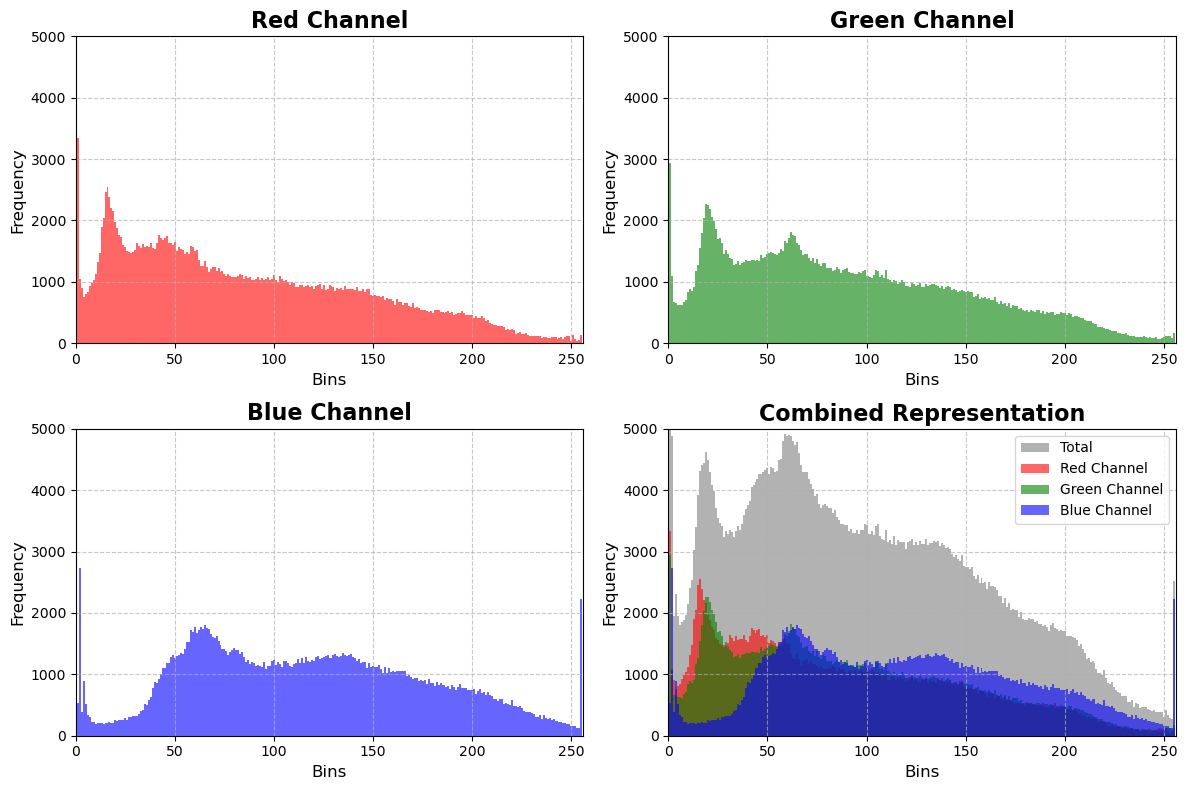

In [31]:
image_path = 'Earth_Western_Hemisphere.jpg'
image = cv2.imread(cv2.samples.findFileOrKeep(image_path), cv2.IMREAD_COLOR)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

raw_pixel_data = image.flatten().astype(float)

hist_red = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten().astype(float)
hist_green = cv2.calcHist([image], [1], None, [256], [0, 256]).flatten().astype(float)
hist_blue = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten().astype(float)

data = {
    'hist_red': hist_red,
    'hist_green': hist_green,
    'hist_blue': hist_blue
}

max_length = max(len(raw_pixel_data), len(hist_red), len(hist_green), len(hist_blue))

for key in data:
    data[key] = np.pad(data[key], (0, max_length - len(data[key])), mode='constant', constant_values=np.nan)

df = pd.DataFrame(data)
df_clean = df.dropna()
df_clean_unique = df_clean.drop_duplicates()
print(df_clean_unique)

# Visualization of Different Histogram Channels
fig, axs = plt.subplots(2, 2, figsize=(12, 8), facecolor='white')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axs[0, 0].bar(range(256), hist_red, color='r', width=1.0, alpha=0.6)
axs[0, 0].set_xlim([0, 256])
axs[0, 0].set_ylim([0, 5000])
axs[0, 0].set_title("Red Channel", fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel("Bins", fontsize=12)
axs[0, 0].set_ylabel("Frequency", fontsize=12)
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

axs[0, 1].bar(range(256), hist_green, color='g', width=1.0, alpha=0.6)
axs[0, 1].set_xlim([0, 256])
axs[0, 1].set_ylim([0, 5000])
axs[0, 1].set_title("Green Channel", fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel("Bins", fontsize=12)
axs[0, 1].set_ylabel("Frequency", fontsize=12)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

axs[1, 0].bar(range(256), hist_blue, color='b', width=1.0, alpha=0.6)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_ylim([0, 5000])
axs[1, 0].set_title("Blue Channel", fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel("Bins", fontsize=12)
axs[1, 0].set_ylabel("Frequency", fontsize=12)
axs[1, 0].grid(True, linestyle='--', alpha=0.7)

hist_total = hist_red + hist_green + hist_blue
axs[1, 1].bar(range(256), hist_total, color='gray', width=1.0, alpha=0.6, label='Total')
axs[1, 1].bar(range(256), hist_red, color='r', width=1.0, alpha=0.6, label='Red Channel')
axs[1, 1].bar(range(256), hist_green, color='g', width=1.0, alpha=0.6, label='Green Channel')
axs[1, 1].bar(range(256), hist_blue, color='b', width=1.0, alpha=0.6, label='Blue Channel')
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_ylim([0, 5000])
axs[1, 1].set_title("Combined Representation", fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel("Bins", fontsize=12)
axs[1, 1].set_ylabel("Frequency", fontsize=12)
axs[1, 1].legend(loc='upper right', fontsize=10)
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h4>
    Technique:<br>
</h4>
<h4>
    Edge Detection Algorithms<br>
</h4>
<h5>
    These techniques detect edges within the image, highlighting areas with significant intensity changes. Different algorithms like Canny, Sobel, Laplacian, and Scharr are used to capture edges in various ways:
</h5>
<h5>
    <ul>Canny: Detects edges by looking for local maxima in the gradient</ul>
    <ul>Sobel: Uses a pair of convolution filters (horizontal and vertical) to compute gradients</ul>
    <ul>Laplacian: Calculates the second derivative of the image, highlighting regions of rapid intensity change</ul>
    <ul>Scharr: Similar to Sobel but provides a better approximation of the gradient's magnitude</ul>
</h5>


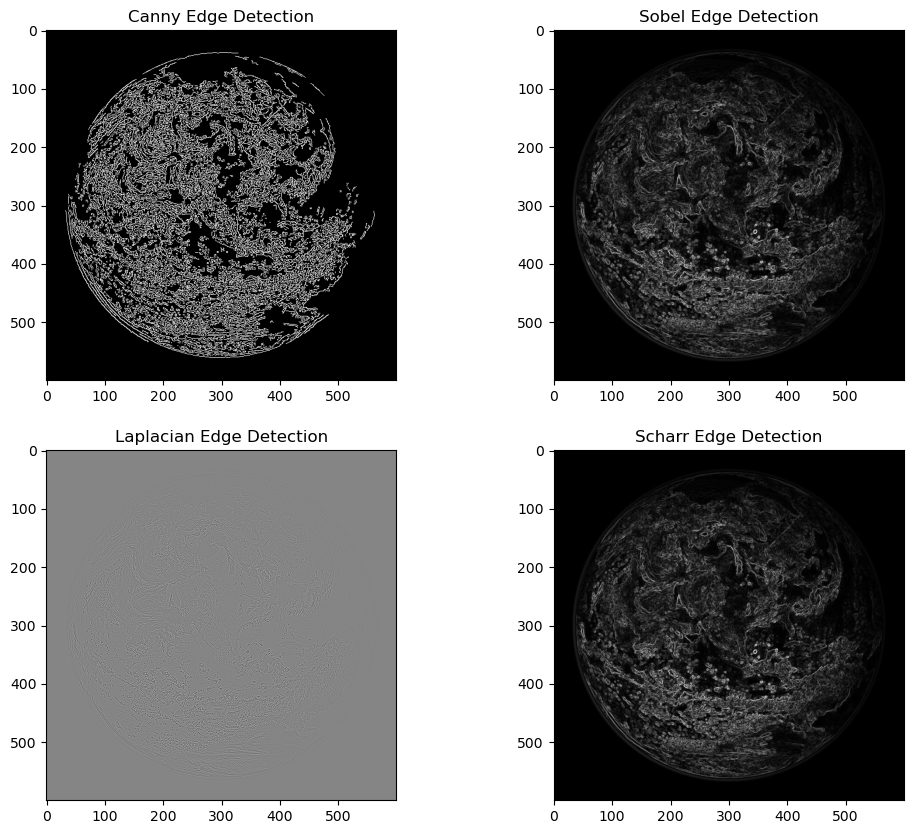

In [5]:
image = cv2.imread('Earth_Western_Hemisphere.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Canny Edge Detection
edges_canny = cv2.Canny(gray_image, 100, 200)

# 2. Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  
edges_sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# 3. Laplacian Edge Detection
edges_laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)

# 4. Scharr Edge Detection
scharr_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)  
scharr_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)  
edges_scharr = np.sqrt(scharr_x**2 + scharr_y**2)

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Canny Edge Detection')
plt.imshow(edges_canny, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Sobel Edge Detection')
plt.imshow(edges_sobel, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Laplacian Edge Detection')
plt.imshow(edges_laplacian, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Scharr Edge Detection')
plt.imshow(edges_scharr, cmap='gray')

plt.show()

<h3>Technique:</h3>
<h4>
    VGG16-based Feature (From Convolutional Nural Network)
</h4>
<h5>
    This technique is not used for final analysis in this specific example but demonstrates a potential approach for more complex feature extraction. VGG16 is trained on a massive image dataset and can capture high-level features related to objects, textures, and colors in the image. For the testing purpose, here only one has been used.
</h5>

In [28]:
# Import libraries
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

In [29]:
model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

img_path = 'Earth_Western_Hemisphere.jpg'

features = extract_features(img_path, model)

features_df = pd.DataFrame(features, columns=['Feature'])
features_df_unique = features_df.drop_duplicates()
print(features_df_unique)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
       Feature
0    10.786718
1     2.574212
2    17.665417
3     0.000000
6     0.975102
..         ...
502   9.649669
503   1.284181
505   0.014928
507   0.975618
510   0.283140

[318 rows x 1 columns]
